In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
#Data Preprocessing

In [3]:
df=pd.DataFrame(pd.read_csv('House_Price_dataset - House_Price_dataset.csv',sep=','))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,yes,no,no,no,yes,2.0,yes,furnished
1,12250000,8960,4.0,4.0,4.0,yes,no,no,no,yes,3.0,no,furnished
2,12250000,9960,3.0,2.0,2.0,yes,no,yes,no,no,2.0,yes,semi-furnished
3,12215000,7500,4.0,2.0,2.0,yes,no,yes,no,yes,3.0,yes,furnished
4,11410000,7420,4.0,1.0,2.0,yes,yes,yes,no,yes,2.0,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,yes,no,yes,no,no,2.0,no,unfurnished
541,1767150,2400,3.0,1.0,1.0,no,no,no,no,no,0.0,no,semi-furnished
542,1750000,3620,2.0,1.0,1.0,yes,no,no,no,no,0.0,no,unfurnished
543,1750000,2910,3.0,1.0,1.0,no,no,no,no,no,0.0,no,furnished


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,540.000000,540.000000,543.000000,541.000000
mean,4.766729e+06,5150.541284,2.961111,1.285185,1.804788,0.691312
std,1.870440e+06,2170.141023,0.738779,0.502464,0.869011,0.860070
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [5]:
(df.isnull()).sum()

price               0
area                0
bedrooms            5
bathrooms           5
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             4
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.select_dtypes(include=['int64', 'float64']).mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.961111e+00
bathrooms    1.285185e+00
stories      1.804788e+00
parking      6.913124e-01
dtype: float64

In [7]:
df.select_dtypes(include=['int64', 'float64']).median()

price        4340000.0
area            4600.0
bedrooms           3.0
bathrooms          1.0
stories            2.0
parking            0.0
dtype: float64

In [10]:
df.select_dtypes(include=['int64', 'float64']).mean()

price        4.766729e+06
area         5.150541e+03
bedrooms     2.961111e+00
bathrooms    1.285185e+00
stories      1.804788e+00
parking      6.913124e-01
dtype: float64

In [6]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,yes,no,no,no,no,0.0,no,semi-furnished
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df=df.fillna(df.mode().iloc[0])
#df=df.fillna(df.select_dtypes(include=['int64', 'float64']).median())

In [35]:
(df.isnull()).sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [36]:
x = df[['area']]
y = df[['price']]

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=70)

In [38]:
priceModel = LinearRegression().fit(x_train,y_train)

In [39]:
priceModel.coef_

array([[464.29117589]])

In [40]:
y_tpred = priceModel.predict(x_train)

In [41]:
train_mse = mean_squared_error(y_train,y_tpred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train,y_tpred)
print("Mean squared error",train_mse,"\nRMSE",train_rmse,"\nR^2 Score",train_r2)

Mean squared error 2487911673467.7773 
RMSE 1577311.5334225441 
R^2 Score 0.29859660823927303


<Axes: xlabel='area', ylabel='price'>

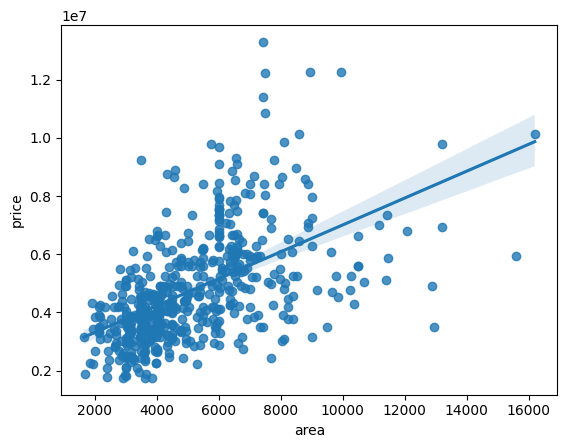

In [42]:
sns.regplot(x="area",y="price",data=df)

In [43]:
y_tpred = priceModel.predict(x_test)

In [45]:
x2 = df.drop(columns=['price'])
x2 = x2.replace({'yes': 1, 'no': 0})
x2 = x2.replace({'furnished': 2, 'semi-furnished': 1,'unfurnished':0})

In [47]:
x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=70,shuffle=True)

In [48]:
betterPriceModel = LinearRegression().fit(x2_train,y_train)

In [49]:
y2t_pred=betterPriceModel.predict(x2_train)

In [50]:
train2_mse = mean_squared_error(y_train,y2t_pred)
train2_rmse = np.sqrt(train2_mse)
train2_r2 = r2_score(y_train,y2t_pred)
print("Mean squared error",train2_mse,"\nRMSE",train2_rmse,"\nR^2 Score",train2_r2)

Mean squared error 1170811185288.5754 
RMSE 1082040.2882002941 
R^2 Score 0.6699195774389537


In [51]:
x2_test = x2_test[x2_train.columns]

y2_pred=betterPriceModel.predict(x2_test)

In [52]:
test2_mse = mean_squared_error(y_test,y2_pred)
test2_rmse = np.sqrt(test2_mse)
test2_r2 = r2_score(y_test,y2_pred)
print("Mean squared error",test2_mse,"\nRMSE",test2_rmse,"\nR^2 Score",test2_r2)

Mean squared error 989026605743.8591 
RMSE 994498.1677931132 
R^2 Score 0.691498523179515


In [53]:
df.replace({
    'mainroad': {'yes': 1, 'no': 0},
    'guestroom': {'yes': 1, 'no': 0},
    'basement': {'yes': 1, 'no': 0},
    'hotwaterheating': {'yes': 1, 'no': 0},
    'airconditioning': {'yes': 1, 'no': 0},
    'prefarea': {'yes': 1, 'no': 0},
    'furnishingstatus': {'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0}
}, inplace=True)

In [54]:
df


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4.0,2.0,3.0,1,0,0,0,1,2.0,1,2
1,12250000,8960,4.0,4.0,4.0,1,0,0,0,1,3.0,0,2
2,12250000,9960,3.0,2.0,2.0,1,0,1,0,0,2.0,1,1
3,12215000,7500,4.0,2.0,2.0,1,0,1,0,1,3.0,1,2
4,11410000,7420,4.0,1.0,2.0,1,1,1,0,1,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2.0,1.0,1.0,1,0,1,0,0,2.0,0,0
541,1767150,2400,3.0,1.0,1.0,0,0,0,0,0,0.0,0,1
542,1750000,3620,2.0,1.0,1.0,1,0,0,0,0,0.0,0,0
543,1750000,2910,3.0,1.0,1.0,0,0,0,0,0,0.0,0,2


In [11]:
df.mean()

price               4.766729e+06
area                5.150541e+03
bedrooms            2.961111e+00
bathrooms           1.285185e+00
stories             1.804788e+00
mainroad            8.587156e-01
guestroom           1.779817e-01
basement            3.504587e-01
hotwaterheating     4.587156e-02
airconditioning     3.155963e-01
parking             6.913124e-01
prefarea            2.348624e-01
furnishingstatus    9.302752e-01
dtype: float64

In [12]:
df.median()

price               4340000.0
area                   4600.0
bedrooms                  3.0
bathrooms                 1.0
stories                   2.0
mainroad                  1.0
guestroom                 0.0
basement                  0.0
hotwaterheating           0.0
airconditioning           0.0
parking                   0.0
prefarea                  0.0
furnishingstatus          1.0
dtype: float64

In [13]:
df.mode()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,3500000,6000.0,3.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,4200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
(df.isnull()).sum()

price               0
area                0
bedrooms            5
bathrooms           5
stories             2
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             4
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
df=df.fillna(df.mode().iloc[0])

In [17]:
(df.isnull()).sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
x = df[['area']]
y = df[['price']]

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=69)

In [20]:
priceModel = LinearRegression().fit(x_train,y_train)

In [21]:
priceModel.coef_

array([[420.83286393]])

In [22]:
y_tpred = priceModel.predict(x_train)

In [23]:
train_mse = mean_squared_error(y_train,y_tpred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train,y_tpred)
print("Mean squared error",train_mse,"\nRMSE",train_rmse,"\nR^2 Score",train_r2)

Mean squared error 2231722397483.0713 
RMSE 1493895.0423249523 
R^2 Score 0.27316451038299494


<Axes: xlabel='area', ylabel='price'>

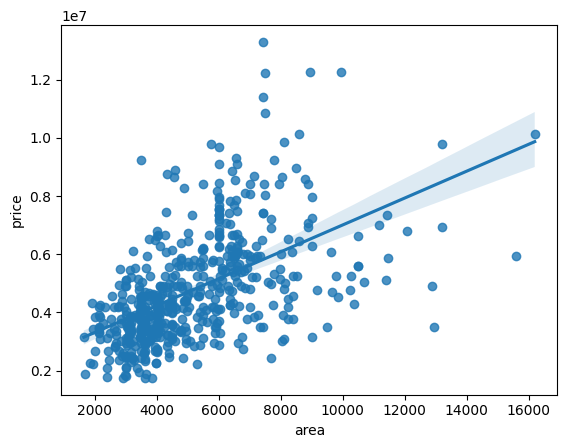

In [24]:
sns.regplot(x="area",y="price",data=df)

In [25]:
y_tpred = priceModel.predict(x_test)

In [27]:
x2 = df.drop(columns=['price'])
x2_train,x2_test,y_train,y_test = train_test_split(x2,y,test_size=0.2,random_state=69,shuffle=True)

In [28]:
betterPriceModel = LinearRegression().fit(x2_train,y_train)

In [31]:
y2t_pred=betterPriceModel.predict(x2_train)
train2_mse = mean_squared_error(y_train,y2t_pred)
train2_rmse = np.sqrt(train2_mse)
train2_r2 = r2_score(y_train,y2t_pred)
print("Mean squared error",train2_mse,"\nRMSE",train2_rmse,"\nR^2 Score",train2_r2)

Mean squared error 929876968560.7394 
RMSE 964301.2851597469 
R^2 Score 0.6971542775706949


In [32]:
x2_test = x2_test[x2_train.columns]

y2_pred=betterPriceModel.predict(x2_test)

In [33]:
test2_mse = mean_squared_error(y_test,y2_pred)
test2_rmse = np.sqrt(test2_mse)
test2_r2 = r2_score(y_test,y2_pred)
print("Mean squared error",test2_mse,"\nRMSE",test2_rmse,"\nR^2 Score",test2_r2)

Mean squared error 2032257490178.0037 
RMSE 1425572.6884932958 
R^2 Score 0.595224504692778
